In [82]:
#Importing dataframes
import pandas as pd

file = 'clients_dataset.csv'
df = pd.read_csv(file)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [83]:
print("Unique values in EDUCATION column:", df["EDUCATION"].unique())
print("Unique values in MARRIAGE column:", df["MARRIAGE"].unique())

valid_education_val = [1, 2, 3, 4]
df["EDUCATION"] = df["EDUCATION"].replace([value for value in df["EDUCATION"] if value not in valid_education_val], 4)

valid_marriage_val = [1, 2, 3]
df["MARRIAGE"] = df["MARRIAGE"].replace([value for value in df["MARRIAGE"] if value not in valid_marriage_val], 3)

print("\nResults:")
print("Unique values in EDUCATION column:", df["EDUCATION"].unique())
print("Unique values in MARRIAGE column:", df["MARRIAGE"].unique())

Unique values in EDUCATION column: [2 1 3 5 4 6 0]
Unique values in MARRIAGE column: [1 2 3 0]

Results:
Unique values in EDUCATION column: [2 1 3 4]
Unique values in MARRIAGE column: [1 2 3]


In [84]:
# One-hot-encoding categorical columns
categorical = ["SEX", "EDUCATION", "MARRIAGE"]
one_hot_df = pd.get_dummies(df, columns=categorical)

one_hot_df.head(3)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,1,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1,0,1,0,1,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0,1,0,1,0,0,0,1,0


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

one_hot_df["LIMIT_BAL"] = scaler.fit_transform(one_hot_df[["LIMIT_BAL"]])
# TODO maybe min-max norm instead?
one_hot_df["AGE"] = scaler.fit_transform(one_hot_df[["AGE"]])

one_hot_df.head(3)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,-1.136720,-1.246020,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,1,0,0,1,0,0
1,2,-0.365981,-1.029047,-1,2,0,0,0,2,2682,...,1,0,1,0,1,0,0,0,1,0
2,3,-0.597202,-0.161156,0,0,0,0,0,0,29239,...,0,0,1,0,1,0,0,0,1,0


In [86]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# Debug print out
# for i in range(7):
#     if i == 1: continue
#     print(f"PAY_{i}")
#     print(min(one_hot_df[f"PAY_{i}"].unique()), max(one_hot_df[f"PAY_{i}"].unique()))

PAY_N_columns = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
BILL_AMT_columns = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
PAY_AMT_columns = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

one_hot_df[PAY_N_columns] = min_max_scaler.fit_transform(one_hot_df[PAY_N_columns])
one_hot_df[BILL_AMT_columns] = min_max_scaler.fit_transform(one_hot_df[BILL_AMT_columns])
one_hot_df[PAY_AMT_columns] = min_max_scaler.fit_transform(one_hot_df[PAY_AMT_columns])

one_hot_df.head(3)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,-1.136720,-1.246020,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,...,1,0,1,0,1,0,0,1,0,0
1,2,-0.365981,-1.029047,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,...,1,0,1,0,1,0,0,0,1,0
2,3,-0.597202,-0.161156,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,...,0,0,1,0,1,0,0,0,1,0


In [87]:
one_hot_df = one_hot_df.drop("ID", axis=1)
one_hot_df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.136720,-1.246020,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,1,0,1,0,1,0,0,1,0,0
1,-0.365981,-1.029047,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,1,0,1,0,1,0,0,0,1,0
2,-0.597202,-0.161156,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0,0,1,0,1,0,0,0,1,0
3,-0.905498,0.164303,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0,0,1,0,1,0,0,1,0,0
4,-0.905498,2.334029,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,...,0,1,0,0,0,1,0,1,0,0
29996,-0.134759,0.815221,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,...,0,1,0,0,0,1,0,0,1,0
29997,-1.059646,0.164303,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,...,1,1,0,0,1,0,0,0,1,0
29998,-0.674276,0.598248,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,...,1,1,0,0,0,1,0,1,0,0


# Logistic Regression

Mean squared error: 0.19
Model Score: 0.81
Confusion matrix:
[[2276   65]
 [ 506  153]]


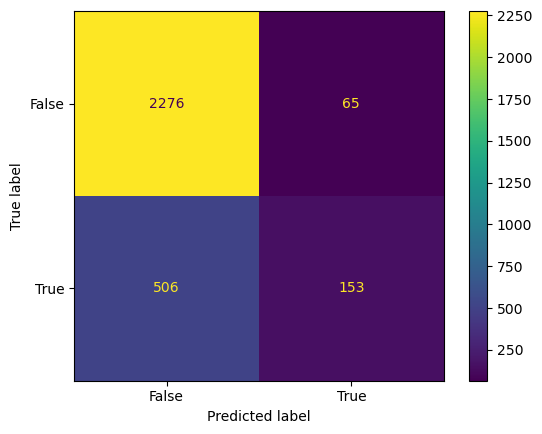

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = one_hot_df.drop('default payment next month', axis=1)  # assuming 'default_payment_next_month' is your target variable
y = one_hot_df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LogisticRegression(max_iter=250)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print("Model Score: %.2f" % model.score(X_test, y_test))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels = [False, True]).plot()

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print('Precision: %.2f'
      % precision_score(y_test, y_pred))

print('Recall: %.2f'
      % recall_score(y_test, y_pred))

print('F1 Score: %.2f'
      % f1_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.70
Recall: 0.23
F1 Score: 0.35
Accuracy: 0.8096666666666666


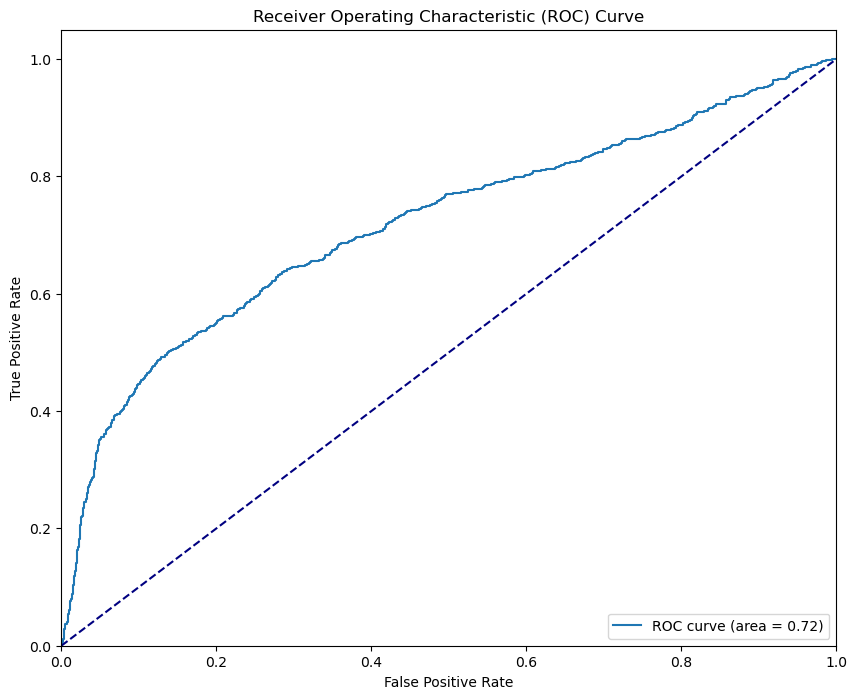

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Adaboost

Mean squared error: 0.18
Model Score: 0.81
Confusion matrix:
[[2250   91]
 [ 453  206]]


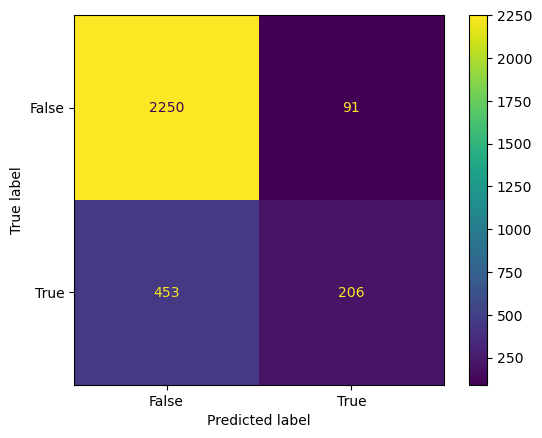

In [111]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print("Model Score: %.2f" % model.score(X_test, y_test))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels = [False, True]).plot()

In [112]:
print('Precision: %.2f'
      % precision_score(y_test, y_pred))

print('Recall: %.2f'
      % recall_score(y_test, y_pred))

print('F1 Score: %.2f'
      % f1_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.69
Recall: 0.31
F1 Score: 0.43
Accuracy: 0.8186666666666667


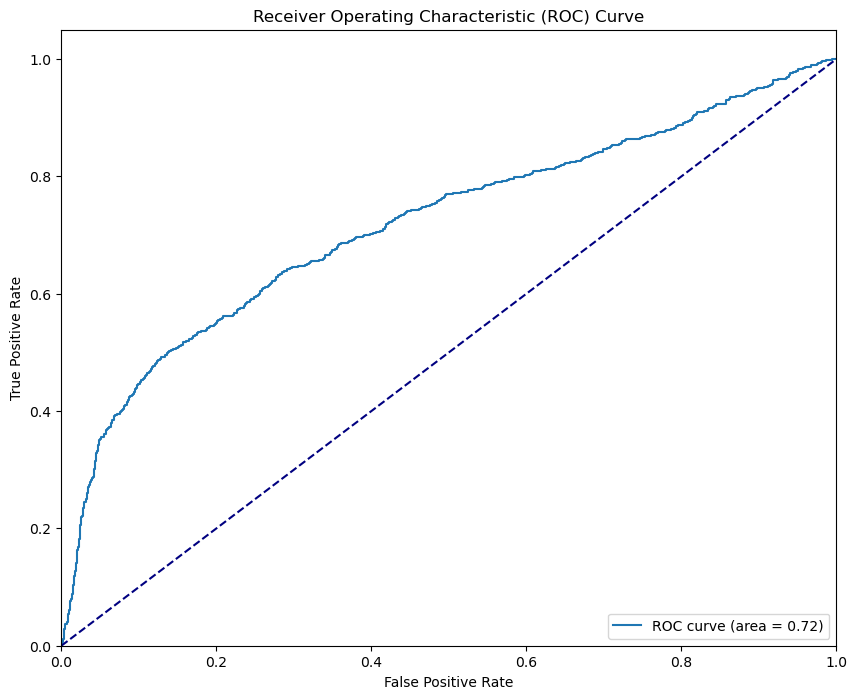

In [113]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()